## Closed-Form Clohessy-Wiltshire Equations Simulation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

### Constants and Initial Conditions

In [7]:
mu = 3.986e14  # Standard gravitational parameter for Earth (m^3/s^2)
a_t = 6000e3  # Semi-major axis of the target vehicle's orbit (m)
n = np.sqrt(mu / a_t**3)  # Mean motion
x0 = 6  # Initial x position (m)
y0 = 5  # Initial y position (m)
z0 = -8  # Initial z position (m)
vx0 = 0.01  # Initial x velocity (m/s)
vy0 = 0.01  # Initial y velocity (m/s)
vz0 = 0.2  # Initial z velocity (m/s)
t = np.linspace(0, 50000, 500000)  # Time

### Closed-Form Clohessy-Wiltshire Equations

\begin{align*}
x(t) &= (4 - 3 \cos(nt))x_0 + \frac{\sin(nt)}{n} \dot{x}_0 + \frac{2}{n}(1 - \cos(nt)) \dot{y}_0 \\
y(t) &= 6(\sin(nt) - nt)x_0 + y_0 + \frac{1}{n}(4 \sin(nt) - 3nt)\dot{x}_0 - \frac{2}{n}(1 - \cos(nt)) \dot{y}_0 \\
z(t) &= z_0 \cos(nt) + \frac{\dot{z}_0}{n} \sin(nt)
\end{align*}

In [8]:
# Without Control Inputs
x = (4 - 3 * np.cos(n * t)) * x0 + (np.sin(n * t) / n) * vx0 + (2 / n) * (1 - np.cos(n * t)) * vy0
y = 6 * (np.sin(n * t) - n * t) * x0 + y0 + (1 / n) * (4 * np.sin(n * t) - 3 * n * t) * vx0 - (2 / n) * (1 - np.cos(n * t)) * vy0
z = z0 * np.cos(n * t) + (vz0 / n) * np.sin(n * t)

### Results

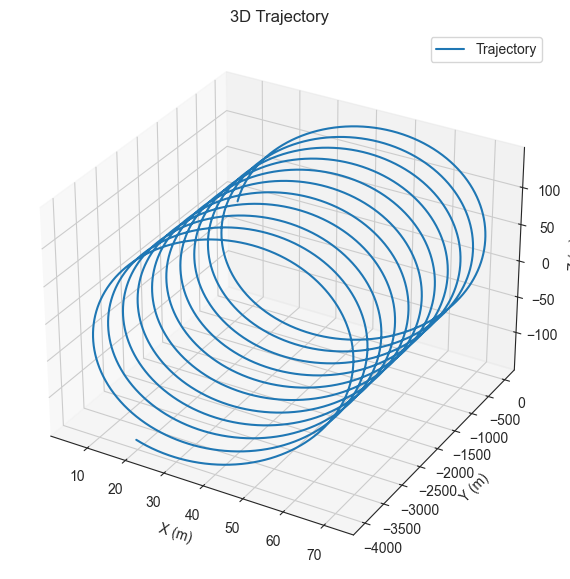

In [9]:
sns.set_style("white")
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(x, y, z, label = 'Trajectory')
ax.set_title("3D Trajectory")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")
ax.legend()
plt.show()

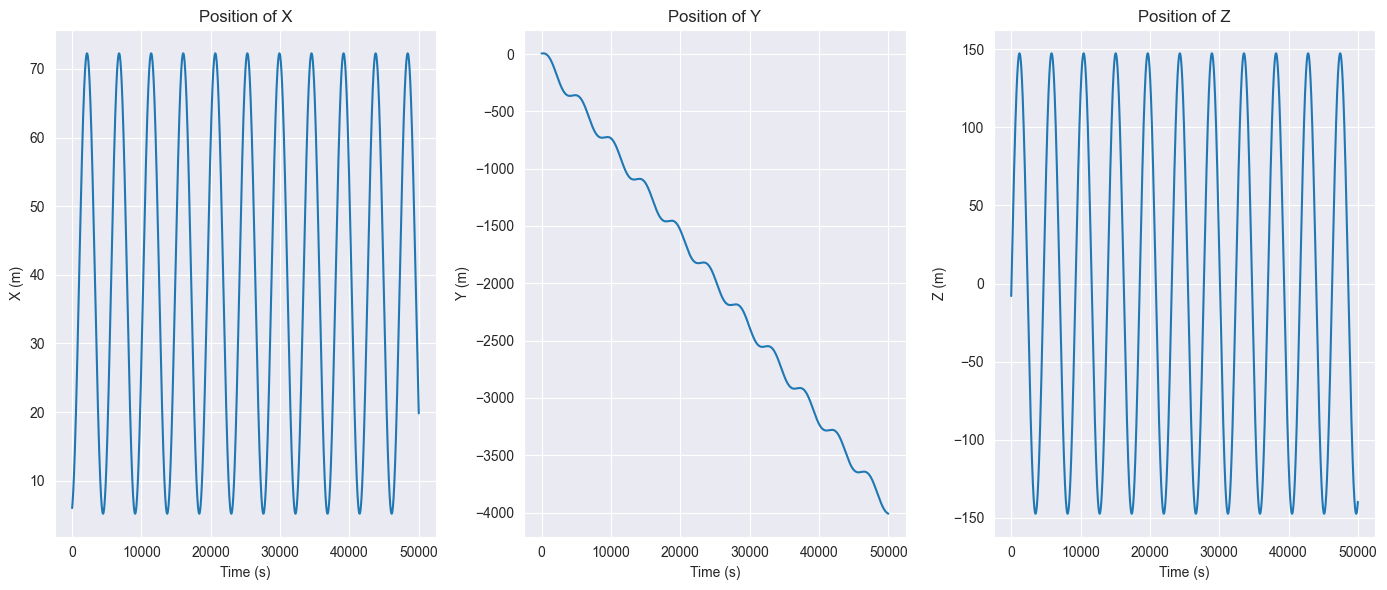

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.lineplot(x=t, y=x).set_title('Position of X')
plt.xlabel("Time (s)")
plt.ylabel("X (m)")

plt.subplot(1, 3, 2)
sns.lineplot(x=t, y=y).set_title('Position of Y')
plt.xlabel("Time (s)")
plt.ylabel("Y (m)")

plt.subplot(1, 3, 3)
sns.lineplot(x=t, y=z).set_title('Position of Z')
plt.xlabel("Time (s)")
plt.ylabel("Z (m)")

plt.tight_layout()
plt.show()